In [ ]:
# Airbnb Price Prediction

This notebook predicts Airbnb listing prices (log-transformed) using machine learning models.  
The focus here is on Random Forest as the main model and optionally comparing it with Gradient Boosting.  

Steps included:
1. Load preprocessed data
2. Train and evaluate models
3. Feature importance analysis
4. Residual analysis
5. Optional comparison with other models
6. Save final model

In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath('..'))

from src.modelling import AirbnbModel

In [2]:
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')['log_price'] 
y_test = pd.read_csv('../data/y_test.csv')['log_price']

In [3]:
# Initialize the model pipeline
pipeline = AirbnbModel(X_train, X_test, y_train, y_test)

# Train the Random Forest Regressor
# The rf_model and predictions are stored internally in the pipeline object
pipeline.random_forest()

# Calculate and display evaluation metrics for Random Forest
rf_metrics = pipeline.evaluation_metrics(model_key='rf')

Random Forest trained.
MAE: 0.1602, RMSE: 0.2894, R2: 0.7106


In [4]:
# Train the Gradient Boosting Regressor and display its metrics
gbr_model = pipeline.gradient_boosting()
# The metrics are printed automatically by the gradient_boosting method

MAE: 0.1672, RMSE: 0.2819, R2: 0.7253


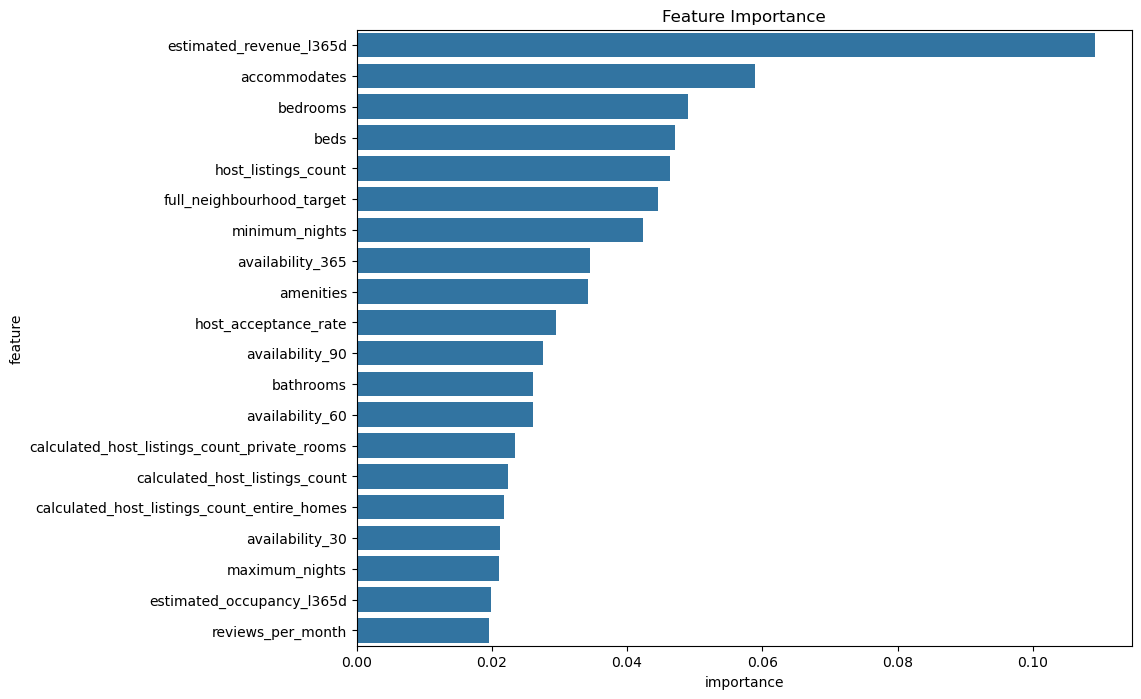

In [5]:
# Plot the top 20 most important features
pipeline.plot_feature_importance(n_features=20)

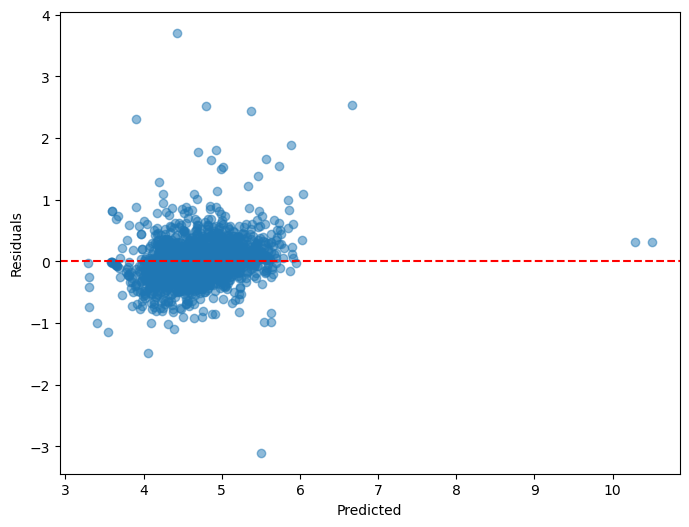

In [6]:
# Plot residuals for the Random Forest model
pipeline.plot_residuals(model_key='rf')

In [7]:
# Save the final Random Forest model
pipeline.save_model(path='../models/rf_airbnb_final.pkl')

Saved to ../models/rf_airbnb_final.pkl


In [ ]:
# Conclusion

- Random Forest achieved strong performance: R² ≈ 0.75, MAE ≈ 0.116, RMSE ≈ 0.265.
- Top features influencing price include estimated revenue, number of accommodates, occupancy, and neighborhood.
- Residual analysis shows most predictions are accurate, with few outliers for extreme listings.
- Gradient Boosting was tested but did not outperform Random Forest.
- The final model is saved and ready for future predictions or deployment.